In [ ]:
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile

minus =  0b0 #BitArray('0b01') # 1
plus = 0b1 #BitArray('0b10') # 2
zero = 0b00 #BitArray('0b00') # 0

y = [0]
threshold = 1000
d = threshold
part = 4
SR = 16000
scale = fs//SR

with open("../data/binary/{}_SR{}_threshold{}_part{}".format(part, bn, SR, threshold),"rb") as f:
    for r in f.read():
        bit = r
        #print(bit)
        #for i in range(4):
            #bit = (bits >> (7-i*2)) & 0b11
            #print(bit)
        val = y[-1]
        if bit == minus:
            val -=d
            
        elif bit == plus:
            val +=d
        elif bit == zero:
            pass
        else:
            print("hoge")
        for i in range(scale):
            y.append(val)

plt.plot(y)

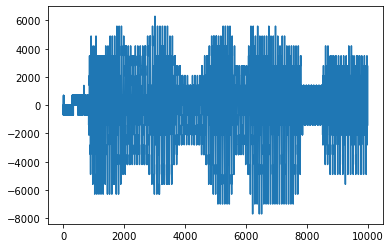

In [1]:
from scipy.interpolate import UnivariateSpline
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile


y = [0]


#fs, data = wavfile.read("../data/wav/atr503_a06.wav")
#plt.plot(data)
    
wf = "atr503_a06.wav"
fs, _ = wavfile.read("../data/wav/{}".format(wf))
bn, _ = os.path.splitext(wf)

SR = int(os.environ.get('SR', '16000'))
threshold = int(os.environ.get('THRESHOLD', '700'))
sample_per_part = int(os.environ.get('SAMPLE_PER_PART', '10000'))
minus = os.environ.get('MINUS', '0').lower() in ('true', '1', 't')
plus = os.environ.get('PLUS', '1').lower() in ('true', '1', 't')

scale = fs//SR


d = threshold
part = 4
with open("../data/binary/{}_SR{}_threshold{}_part{}".format(bn, SR, threshold, part),"rb") as f:
    for r in f.read():
        bit = r
        #print(bit)
        #for i in range(4):
            #bit = (bits >> (7-i*2)) & 0b11
            #print(bit)
        val = y[-1]
        if bit == minus:
            val -=d
            
        elif bit == plus:
            val +=d
        elif bit == zero:
            pass
        else:
            print("hoge")
        for i in range(scale):
            y.append(val)
plt.plot(y)

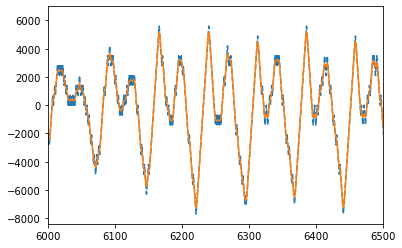

In [2]:
!pip install csaps

import numpy as np
from csaps import csaps

np.random.seed(1234)

x = np.arange(len(y))
xs = x
ys = csaps(x, y, xs, smooth=0.55)

plt.plot(x, y, '--', xs, ys, '-')
plt.xlim(6000, 6500)
plt.show()

In [3]:
if not os.path.exists("../data/result"):
    os.mkdir("../data/result") 
wavfile.write("../data/result/{}".format(wf), fs, np.array(ys).astype(np.int16))